In [1]:
#Primero conectemos la maquina virtual con el drive
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [7]:
cd /gdrive/Shareddrives/GENSyR /CNF (Complejidad y NeuroFísica)/Neurofísica/Proyecto lesiones

/gdrive/Shareddrives/GENSyR /CNF (Complejidad y NeuroFísica)/Neurofísica/Proyecto lesiones


In [20]:
ls

'Conectividad funcional'/
'EDA Estructurales y funcionales- Hubs.ipynb'
 estructural_hammersmith.npy
 Estructural_Promedio.npy
 funcional_hammersmith.npy
 Funcional_Promedio.npy
 Hammersmith2.csv.gsheet
 Hammersmith.gsheet
 initial_condition.bin
'Ising - Entropia '/
'LESIONES - RESULTADOS'/
 M2final.npy
 matriz_asimetri_simetri_threshold.npy
 MATRIZFUNCIONAL_TASKMOTOR.npy
 matriz_sinasimetrizar_threshold.npy
 Mfinal.npy
 otronombre.csv
'Redes Estructurales y funcionales- Hubs.ipynb'
'Redes Funcionales - Hubs.ipynb'
 restingstate_functionalconnectivity.npy
 Tractografia/


In [14]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd 

In [15]:
def strenght(grafo):
  adyacencia = nx.convert_matrix.to_numpy_array(grafo)
  strenght = np.zeros(len(grafo.nodes()))
  for i in range(len(grafo.nodes())):
    strenght[i] = np.sum(adyacencia[i])
  return strenght
  
def medidasred(grafo):
  eigenvector = np.array(list(nx.eigenvector_centrality(grafo, weight='weight',max_iter = 1000000000).values()))
  eigenpromedio = np.sum(eigenvector)/len(eigenvector)
  geodesica_prom = nx.average_shortest_path_length(grafo,weight='weight')
  clustering_prom = nx.average_clustering(grafo,weight='weight')
  pequeñomundo = clustering_prom/geodesica_prom
  return [eigenpromedio,geodesica_prom,clustering_prom,pequeñomundo]

def plotmedidas(Grafo,medidarank):
  grafo = Grafo.copy()
  #removemos los nodos isolados para calcular las medidas
  grafo.remove_nodes_from(list(nx.isolates(grafo)))
  # Las medidas planteadas en el trabajo para hallar los hubs son bastante estándar, razón por la cual Networkx incorpora funciones para calcularlas 

  #Medidas de integración 
  grado = nx.degree_centrality(grafo)
  intermediacion = nx.betweenness_centrality(grafo, weight='weight')
  comunicabilidad = nx.communicability(grafo)
  eigenvector = nx.eigenvector_centrality(grafo, weight='weight',max_iter= 1000000000)

  #Medida de segregación
  clusterización = nx.clustering(grafo,weight='weight')

  #la estructura de datos de las medidas es un diccionario, el cual contiene unas llaves y unos valores asociados a esas llaves

  #Ahora se extraeran los valores
  deg = list(grado.values())

  inter = list(intermediacion.values())

  eigen = list(eigenvector.values())

  clust = list(clusterización.values())

  fuerza = list(strenght(grafo))
  #reorganicemos las medidas para que queden de mayor a menor grado
  deg2 = deg.copy()
  inter2=inter.copy()
  eigen2=eigen.copy()
  clust2=clust.copy()
  stre = fuerza.copy()
  indexs = []
  if medidarank == "fuerza":
    rank = fuerza
    rank_orden = rank.copy()
    rank_orden.sort()
    for i in rank_orden:
      indexs.append(rank.index(i))
    for i in range(len(fuerza)):
      stre[i] = fuerza[indexs[i]]
    for i in range(len(inter)):
      inter2[i] = inter[indexs[i]]
    for i in range(len(clust)):
      clust2[i] = clust[indexs[i]]
    for i in range(len(eigen)):
      eigen2[i] = eigen[indexs[i]]

  
  if medidarank == "grado":
    rank = deg
    rank_orden = rank.copy()
    rank_orden.sort()
    for i in rank_orden:
      indexs.append(rank.index(i))
    for i in range(len(deg)):
      deg2[i] = deg[indexs[i]]
    for i in range(len(inter)):
      inter2[i] = inter[indexs[i]]
    for i in range(len(clust)):
      clust2[i] = clust[indexs[i]]
    for i in range(len(eigen)):
      eigen2[i] = eigen[indexs[i]]

  if medidarank == "intermediacion":
    rank = inter
    rank_orden = rank.copy()
    rank_orden.sort()
    for i in rank_orden:
      indexs.append(rank.index(i))
    for i in range(len(deg)):
      deg2[i] = deg[indexs[i]]
    for i in range(len(inter)):
      inter2[i] = inter[indexs[i]]
    for i in range(len(clust)):
      clust2[i] = clust[indexs[i]]
    for i in range(len(eigen)):
      eigen2[i] = eigen[indexs[i]]

  if medidarank == "eigenvector":
    rank = eigen
    rank_orden = rank.copy()
    rank_orden.sort()
    for i in rank_orden:
      indexs.append(rank.index(i))
    for i in range(len(deg)):
      deg2[i] = deg[indexs[i]]
    for i in range(len(inter)):
      inter2[i] = inter[indexs[i]]
    for i in range(len(clust)):
      clust2[i] = clust[indexs[i]]
    for i in range(len(eigen)):
      eigen2[i] = eigen[indexs[i]]

  if medidarank == "clusterizacion":
    rank = clust
    rank_orden = rank.copy()
    rank_orden.sort()
    for i in rank_orden:
      indexs.append(rank.index(i))
    for i in range(len(deg)):
      deg2[i] = deg[indexs[i]]
    for i in range(len(inter)):
      inter2[i] = inter[indexs[i]]
    for i in range(len(clust)):
      clust2[i] = clust[indexs[i]]
    for i in range(len(eigen)):
      eigen2[i] = eigen[indexs[i]]

  
  plt.figure(figsize=(10,10))
  plt.subplot(321)
  plt.plot(deg2)
  plt.title("Grado")
  plt.xlabel("Nodos")
  plt.ylabel("Centralidad de grado")
  plt.subplot(322)
  plt.plot(inter2)
  plt.title("intermediacion")
  plt.xlabel("Nodos")
  plt.ylabel("Centralidad de intermediación")
  plt.subplot(323)
  plt.plot(clust2)
  plt.xlabel("Nodos")
  plt.ylabel("Clusterización")
  plt.title("clusterizacion")
  plt.subplot(324)
  plt.plot(eigen2)
  plt.xlabel("Nodos")
  plt.ylabel("Centralidad de Eigenvector")
  plt.title("eigenvector")
  plt.subplot(325)
  plt.plot(stre)
  plt.title("Strenght")
  plt.xlabel("Nodos")
  plt.ylabel("Strenght")
  plt.show()
  return;

In [16]:
estruc = np.load("Estructural_Promedio.npy")
func = np.load("Funcional_Promedio.npy")
#func = np.load("MATRIZFUNCIONAL_TASKMOTOR.npy")
func = func*(func>0.6)
"62,L_Superior_parietal_gyrus"
"63,R_Superior_parietal_gyrus"
"22, L_lateral_remainder_occipital_lobe"
"66, L_cuneus"
"30, L_posterior_temporal_lobe"
"58, L_superior_frontal"
estruc62 = estruc.copy()
func62 = func.copy()
estruc63 = estruc.copy()
func63 = func.copy()
estruc22 = estruc.copy()
func22 = func.copy()
estruc66 = estruc.copy()
func66 = func.copy()
estruc30 = estruc.copy()
func30 = func.copy()
estruc58 = estruc.copy()
func58 = func.copy()



estruc62[62] = estruc62[62]*0
func62[62-1] = func62[62-1]*0
estruc63[63] = estruc63[63]*0
func63[63-1] = func63[63-1]*0
estruc22[22] = estruc22[22]*0
func22[22-1] = func22[22-1]*0
estruc66[66] = estruc66[66]*0
func66[66-1] = func66[66-1]*0
estruc30[30] = estruc30[30]*0
func30[30-1] = func30[30-1]*0
estruc58[58] = estruc58[58]*0
func58[58-1] = func58[58-1]*0


estruc62[:][62] = estruc62[:][62]*0
func62[:][62-1] = func62[:][62-1]*0
estruc63[:][63] = estruc63[:][63]*0
func63[:][63-1] = func63[:][63-1]*0
estruc22[:][22] = estruc22[:][22]*0
func22[:][22-1] = func22[:][22-1]*0
estruc66[:][66] = estruc66[:][66]*0
func66[:][66-1] = func66[:][66-1]*0
estruc30[:][30] = estruc30[:][30]*0
func30[:][30-1] = func30[:][30-1]*0
estruc58[:][58] = estruc58[:][58]*0
func58[:][58-1] = func58[:][58-1]*0

In [ ]:
labelcsv = pd.read_csv("otronombre.csv")
print(labelcsv.values)
print(labelcsv.values[0][1])

In [21]:
#matriz_asimetri_simetri_threshold.npy
 #MATRIZFUNCIONAL_TASKMOTOR.npy
 #matriz_sinasimetrizar_threshold.npy

estruc = np.load("matriz_sinasimetrizar_threshold.npy")
ESTRUCLESIONADA = estruc
FUNCLESIONADA = func
gestructural = nx.convert_matrix.from_numpy_array(ESTRUCLESIONADA)
gfuncional = nx.convert_matrix.from_numpy_array(FUNCLESIONADA)
gestructural.remove_node(0) #quitamos la parcela "null" de la red estructural
#Ahora leamos el archivo con los labels correspondientes a esta parcelación, este archivo también está en el Drive de GENSyR
#labelcsv = pd.read_csv("AAL.csv")
labelcsv = pd.read_csv("otronombre.csv")
print(labelcsv.values[0][1])
for i in range(len(gfuncional.nodes())):
    prueba = { i : labelcsv.values[i][1]}
    gfuncional = nx.relabel_nodes(gfuncional,prueba)
    #gestructural = nx.relabel_nodes(gestructural,prueba)
isolados_estructural = list(nx.isolates(gestructural))
isolados_funcional = list(nx.isolates(gfuncional))
gestructural.remove_nodes_from(isolados_estructural)
gfuncional.remove_nodes_from(isolados_funcional)
Gcc = sorted(nx.connected_components(gfuncional), key=len, reverse=True)
gfuncional = gfuncional.subgraph(Gcc[0])


R_Hippocampus


In [36]:
#matriz_asimetri_simetri_threshold.npy
 #MATRIZFUNCIONAL_TASKMOTOR.npy
 #matriz_sinasimetrizar_threshold.npy
estruc = np.load("matriz_sinasimetrizar_threshold.npy")
ESTRUCLESIONADA = estruc
FUNCLESIONADA = func
gestructural = nx.convert_matrix.from_numpy_array(ESTRUCLESIONADA)
gfuncional = nx.convert_matrix.from_numpy_array(FUNCLESIONADA)
gestructural.remove_node(0) #quitamos la parcela "null" de la red estructural
#Ahora leamos el archivo con los labels correspondientes a esta parcelación, este archivo también está en el Drive de GENSyR
#labelcsv = pd.read_csv("AAL.csv")
labelcsv = pd.read_csv("otronombre.csv")
print(labelcsv.keys)
for i in range(len(gestructural.nodes())):
    prueba = { i+1 : labelcsv.values[i][1]}
    gfuncional = nx.relabel_nodes(gfuncional,prueba)
    gestructural = nx.relabel_nodes(gestructural,prueba)
isolados_estructural = list(nx.isolates(gestructural))
isolados_funcional = list(nx.isolates(gfuncional))
gestructural.remove_nodes_from(isolados_estructural)
gfuncional.remove_nodes_from(isolados_funcional)
Gcc = sorted(nx.connected_components(gfuncional), key=len, reverse=True)
gfuncional = gfuncional.subgraph(Gcc[0])



<bound method NDFrame.keys of     -1                                   Titulo
0    1                            R_Hippocampus
1    2                            L_Hippocampus
2    3                               R_Amygdala
3    4                               L_Amygdala
4    5     R_Anterior_temporal_lobe_medial_part
..  ..                                      ...
78  79                       R_Subcallosal_area
79  80           L_Pre-subgenual_frontal_cortex
80  81           R_Pre-subgenual_frontal_cortex
81  82  L_Superior_temporal_gyrus_anterior_part
82  83  R_Superior_temporal_gyrus_anterior_part

[83 rows x 2 columns]>


#FINAL FINAL FINAL FINAL

In [37]:
pos = nx.spring_layout(gestructural)
pos2 = nx.kamada_kawai_layout(gestructural)
#posfunc = nx.kamada_kawai_layout(gfuncional)

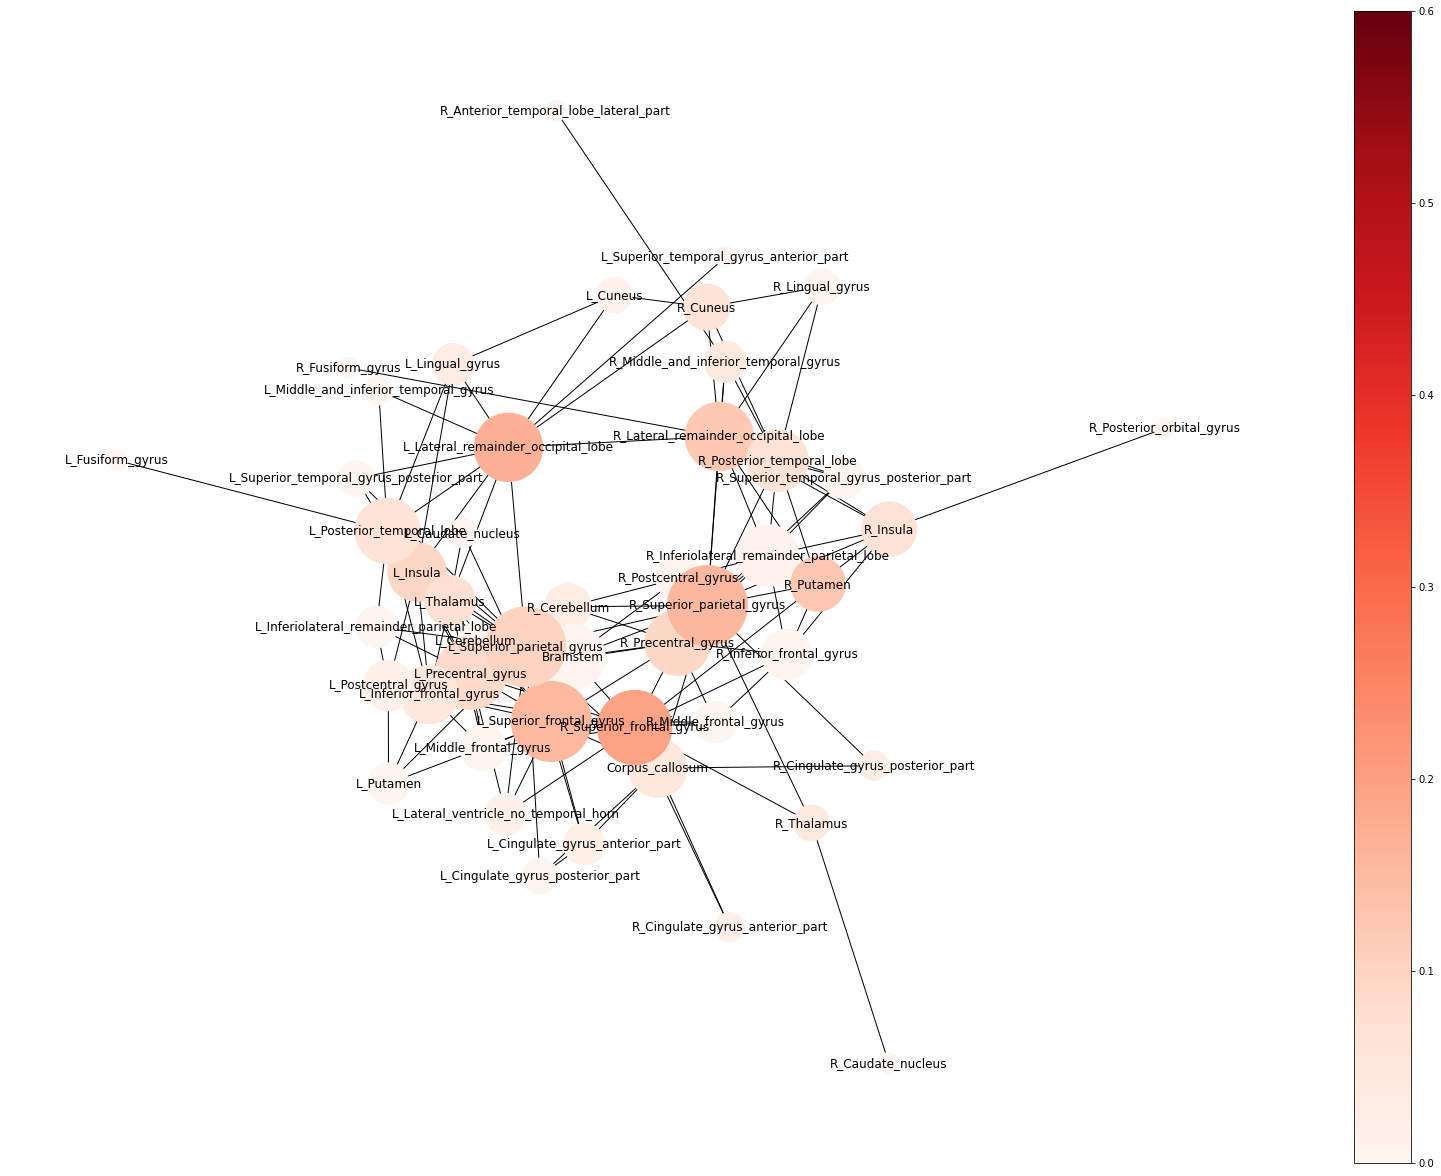

In [38]:
tamañoprom = 20000
grafo = gestructural
tamaño = nx.degree_centrality(grafo)
color = nx.betweenness_centrality(grafo,weight='weight')
#color = strenght(grafo)
vmax = 0.6
#plt.figure(figsize=(18,14)) #funcional
plt.figure(figsize=(22,16)) #estructural
nx.draw(grafo, pos = pos, node_size = [tamaño[i]*tamañoprom for i in grafo.nodes()], with_labels = True, node_color = [color[i] for i in grafo.nodes()], vmin = 0, vmax= vmax, cmap = "Reds")
#nx.draw(grafo, pos = posfunc, node_size = [tamaño[i]*tamañoprom for i in grafo.nodes()], with_labels = True, node_color = color, vmin = 0, vmax = vmax, cmap = "Reds")
sm = plt.cm.ScalarMappable(cmap="Reds", norm=plt.Normalize(vmin = 0, vmax=vmax))
sm._A = []
plt.colorbar(sm)
plt.show()

In [ ]:
print(len(gestructural.nodes()))
color = [0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0]
print(len(color))

48
48
